In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from scipy import stats
import math

In [99]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
init_printing(use_unicode=True)

## 1.  rv_continuous 代表连续型随机变量，rv_discrete 代表离散型随机变量

In [3]:
print("连续型：", [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)], sep = "\t", end = "")
print("")
print("离散型：", [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_discrete)], sep = "\t", end = "")

连续型：	['ksone', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'weibull_max', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'levy', 'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gilbrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'reciprocal', 'rice', 'recipinvgauss', 'semicircular', 'skewnorm', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukey

## 生成正态分布

In [124]:
X = stats.norm(loc = 3.7, scale = 0.97)    ##µ = 3.7，σ = 0.97
X.stats()

(array(3.7), array(0.9409))

In [125]:
x = X.rvs(size = 10000)    #对随机变量取10000个值
print("对μ=1，σ=2的总体取样1w次得样本：{0}，均值：{1}，标准差：{2}".format(x, np.mean(x), np.std(x)))    #期望值与方差
x.max(),x.min()

对μ=1，σ=2的总体取样1w次得样本：[3.83109589 2.73270014 5.71080462 ... 4.40106824 4.18156717 3.3304142 ]，均值：3.7015952488221124，标准差：0.9828707621766749


In [127]:
stats.norm.fit(x)

## 绘制分布图

### &nbsp;&nbsp;&nbsp;正态分布，Probability Density Function(pdf) = $\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

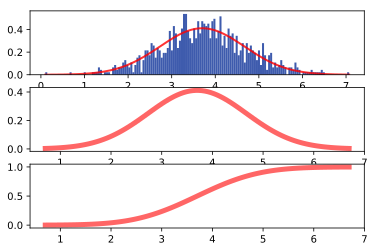

In [116]:
mu, sigma, samples = 3.7, 0.97, 1000
rate = np.random.normal(mu, sigma, samples)
#rate = stats.norm.rvs(mu, sigma, samples)

plt.figure()

'''绘制离散正态分布'''
plt.subplot(311)
count, bins, ignored = plt.hist(rate, 150, density=True, color='#294AA4', alpha = 0.9)    #count = 每一bin区间对应概率值, bins = 每个bin的分界值(对应左侧)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 'r-', lw=2, alpha = 0.8)

'''绘制pdf'''
plt.subplot(312)
x = np.linspace(stats.norm(mu, sigma).ppf(0.001), stats.norm(mu, sigma).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu, sigma).pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

'''绘制cdf'''
plt.subplot(313)
x = np.linspace(stats.norm(mu, sigma).ppf(0.001), stats.norm(mu, sigma).ppf(0.999), 100)    #ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).cdf的反函数
plt.plot(x, stats.norm(mu, sigma).cdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

plt.show()